<a href="https://colab.research.google.com/github/CatalinaOrtegha/Challenge-Data-Science-Alura-Store/blob/main/Challenge_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importación de datos

In [116]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

#Creación de los dataframes
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [117]:
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]

#Análisis de datos

In [118]:
#Composición del dataframe
tienda1.info()

#Primeras filas del dataframe (información parcial)
tienda1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


##1. Análisis de facturación



In [119]:
#Ingreso total por cada tienda

ingreso_tienda1=tienda1["Precio"].sum()
ingreso_tienda2=tienda2["Precio"].sum()
ingreso_tienda3=tienda3["Precio"].sum()
ingreso_tienda4=tienda4["Precio"].sum()

print(f'El ingreso total de la tienda 1 es ${ingreso_tienda1:.0f}')
print(f'El ingreso total de la tienda 2 es ${ingreso_tienda2:.0f}')
print(f'El ingreso total de la tienda 3 es ${ingreso_tienda3:.0f}')
print(f'El ingreso total de la tienda 4 es ${ingreso_tienda4:.0f}')

El ingreso total de la tienda 1 es $1150880400
El ingreso total de la tienda 2 es $1116343500
El ingreso total de la tienda 3 es $1098019600
El ingreso total de la tienda 4 es $1038375700


##2. Ventas por categoría

In [120]:
#Cantidad de productos por categoría en cada tienda


productos_t1=tienda1["Categoría del Producto"].value_counts().sort_values(ascending=False)
productos_t2=tienda2["Categoría del Producto"].value_counts().sort_values(ascending=False)
productos_t3=tienda3["Categoría del Producto"].value_counts().sort_values(ascending=False)
productos_t4=tienda4["Categoría del Producto"].value_counts().sort_values(ascending=False)


print("Tienda 1\n",productos_t1,"\n")
print("Tienda 2\n",productos_t2,"\n")
print("Tienda 3\n",productos_t3,"\n")
print("Tienda 4\n",productos_t4,"\n")


Tienda 1
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Tienda 2
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Tienda 3
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64 

Tienda 4
 Categoría del Producto
Muebles                    480
Electróni

In [121]:
def contar_categorias(df, columna):
    return df[columna].value_counts().sort_values(ascending=False).head(1)

for i, df in enumerate(lista_tiendas, start=1):
    ranking = contar_categorias(df, "Categoría del Producto")
    print(f"Tienda {i}: Categoría con mayor cantidad de ventas\n", ranking, "\n")

Tienda 1: Categoría con mayor cantidad de ventas
 Categoría del Producto
Muebles    465
Name: count, dtype: int64 

Tienda 2: Categoría con mayor cantidad de ventas
 Categoría del Producto
Muebles    442
Name: count, dtype: int64 

Tienda 3: Categoría con mayor cantidad de ventas
 Categoría del Producto
Muebles    499
Name: count, dtype: int64 

Tienda 4: Categoría con mayor cantidad de ventas
 Categoría del Producto
Muebles    480
Name: count, dtype: int64 



##3. Calificación promedio en cada tienda

In [122]:
# Calificaciones promedio en cada tienda

calificacion_t1=tienda1["Calificación"].mean()
calificacion_t2=tienda2["Calificación"].mean()
calificacion_t3=tienda3["Calificación"].mean()
calificacion_t4=tienda4["Calificación"].mean()

print(f'La calificación promedio de la tienda 1 es: {calificacion_t1:.2f}')
print(f'La calificación promedio de la tienda 2 es: {calificacion_t2:.2f}')
print(f'La calificación promedio de la tienda 3 es: {calificacion_t3:.2f}')
print(f'La calificación promedio de la tienda 4 es: {calificacion_t4:.2f}')

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


##4. Productos más y menos vendidos

In [123]:
#Mayor cantidad de ventas

def contar_productos_mas_vendidos(df, columna):
    return df[columna].value_counts().sort_values(ascending=False).head()

for i, df in enumerate(lista_tiendas, start=1):
    ranking = contar_productos_mas_vendidos(df, "Producto")
    print(f"Tienda {i}: Productos más vendidos\n", ranking, "\n")

Tienda 1: Productos más vendidos
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64 

Tienda 2: Productos más vendidos
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64 

Tienda 3: Productos más vendidos
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64 

Tienda 4: Productos más vendidos
 Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64 



In [124]:
#Menos cantidad de ventas

def contar_productos_menos_vendidos(df, columna):
    return df[columna].value_counts().sort_values(ascending=False).tail()

for i, df in enumerate(lista_tiendas, start=1):
    ranking = contar_productos_menos_vendidos(df, "Producto")
    print(f"Tienda {i}: Productos menos vendidos\n", ranking, "\n")

Tienda 1: Productos menos vendidos
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64 

Tienda 2: Productos menos vendidos
 Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64 

Tienda 3: Productos menos vendidos
 Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64 

Tienda 4: Productos menos vendidos
 Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64 



In [125]:
#Mayores ingresos

def productos_mayores_ingresos(df, columna_producto, columna_precio="Precio"):
    return (
        df.groupby(columna_producto)[columna_precio]
          .sum()
          .sort_values(ascending=False)
          .head()
    )

for i, df in enumerate(lista_tiendas, start=1):
    ranking = productos_mayores_ingresos(df, "Producto", "Precio")
    print(f"Tienda {i}: Productos mayores ingresos\n", ranking, "\n")

Tienda 1: Productos mayores ingresos
 Producto
TV LED UHD 4K      142,150,200
Refrigerador       112,143,300
Iphone 15           97,902,200
Smart TV            67,452,100
Lavadora de ropa    65,783,600
Name: Precio, dtype: float64 

Tienda 2: Productos mayores ingresos
 Producto
Iphone 15          113,225,800
TV LED UHD 4K      103,375,000
Refrigerador        97,632,500
Lavadora de ropa    66,762,300
Smart TV            61,142,000
Name: Precio, dtype: float64 

Tienda 3: Productos mayores ingresos
 Producto
Refrigerador    99,889,700
TV LED UHD 4K   96,669,100
Iphone 15       93,225,700
Smart TV        78,837,300
Lavavajillas    64,364,800
Name: Precio, dtype: float64 

Tienda 4: Productos mayores ingresos
 Producto
Iphone 15       96,697,500
TV LED UHD 4K   90,295,300
Smart TV        82,790,400
Refrigerador    75,271,900
Tablet ABXY     56,723,100
Name: Precio, dtype: float64 



In [126]:
#Menores ingresos

def productos_menores_ingresos(df, columna_producto, columna_precio="Precio"):
    return (
        df.groupby(columna_producto)[columna_precio]
          .sum()
          .sort_values(ascending=False)
          .tail()
    )

for i, df in enumerate(lista_tiendas, start=1):
    ranking = productos_menores_ingresos(df, "Producto", "Precio")
    print(f"Tienda {i}: Productos menores ingresos\n", ranking, "\n")

Tienda 1: Productos menores ingresos
 Producto
Ajedrez de madera    1,430,600
Set de vasos         1,359,100
Cubo mágico 8x8        696,900
Dinosaurio Rex         688,900
Cuerda para saltar     652,800
Name: Precio, dtype: float64 

Tienda 2: Productos menores ingresos
 Producto
Set de vasos         1,542,600
Ajedrez de madera    1,287,700
Cuerda para saltar     856,900
Dinosaurio Rex         770,300
Cubo mágico 8x8        643,600
Name: Precio, dtype: float64 

Tienda 3: Productos menores ingresos
 Producto
Bloques de construcción   1,237,200
Set de vasos              1,210,700
Cuerda para saltar          853,800
Dinosaurio Rex              795,600
Cubo mágico 8x8             640,400
Name: Precio, dtype: float64 

Tienda 4: Productos menores ingresos
 Producto
Set de vasos         1,471,800
Ajedrez de madera    1,075,500
Dinosaurio Rex         858,100
Cubo mágico 8x8        748,400
Cuerda para saltar     704,800
Name: Precio, dtype: float64 



##5. Envio promedio por cada tienda

In [127]:
t1_promedio_costo_envio=tienda1["Costo de envío"].mean()
t2_promedio_costo_envio=tienda2["Costo de envío"].mean()
t3_promedio_costo_envio=tienda3["Costo de envío"].mean()
t4_promedio_costo_envio=tienda4["Costo de envío"].mean()

print(f'El costo promedio de envío de la tienda 1 es: ${t1_promedio_costo_envio:.2f}')
print(f'El costo promedio de envío de la tienda 2 es: ${t2_promedio_costo_envio:.2f}')
print(f'El costo promedio de envío de la tienda 3 es: ${t3_promedio_costo_envio:.2f}')
print(f'El costo promedio de envío de la tienda 4 es: ${t4_promedio_costo_envio:.2f}')


El costo promedio de envío de la tienda 1 es: $26018.61
El costo promedio de envío de la tienda 2 es: $25216.24
El costo promedio de envío de la tienda 3 es: $24805.68
El costo promedio de envío de la tienda 4 es: $23459.46


#Visualización

##1. Ingresos de las tiendas

In [128]:
#Importacion de las librerias

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # para formato del eje Y
pd.options.display.float_format = '{:,.0f}'.format #sin anotación cientifica


Tienda
Tienda 1   1,150,880,400
Tienda 2   1,116,343,500
Tienda 3   1,098,019,600
Tienda 4   1,038,375,700
Name: Precio, dtype: float64


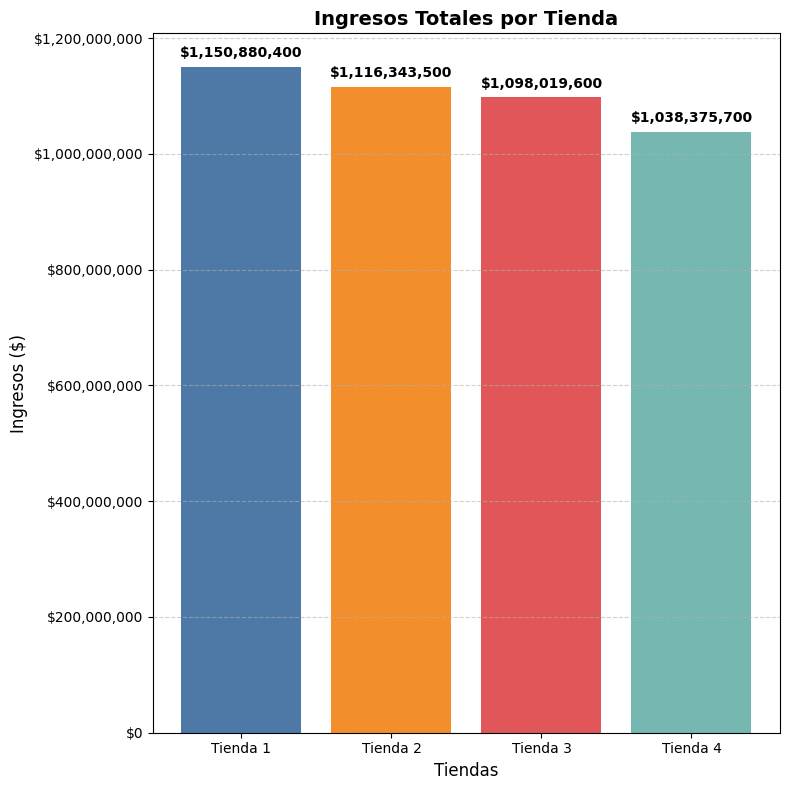

In [129]:
# Agregar nombre de tienda a cada DataFrame (creamos la columna tienda para identificar)
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todos los DataFrames
tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

#Creacion del grafico

ingresos_por_tienda = tiendas.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)
print(ingresos_por_tienda)

plt.figure(figsize=(8,8))
barras = plt.bar(
    ingresos_por_tienda.index,
    ingresos_por_tienda.values,
    color=["#4E79A7", "#F28E2B", "#E15759", "#76B7B2"],
)

# Títulos
plt.title("Ingresos Totales por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Ingresos ($)", fontsize=12)

# Mostrar valores completos en el eje Y (sin notación científica)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Añadir valores encima de cada barra
for barra in barras:
    plt.text(
        barra.get_x() + barra.get_width()/2,
        barra.get_height() + max(ingresos_por_tienda)*0.01,
        f"${barra.get_height():,.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Cuadrícula y ajuste
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##2. Distribución de categoría de productos

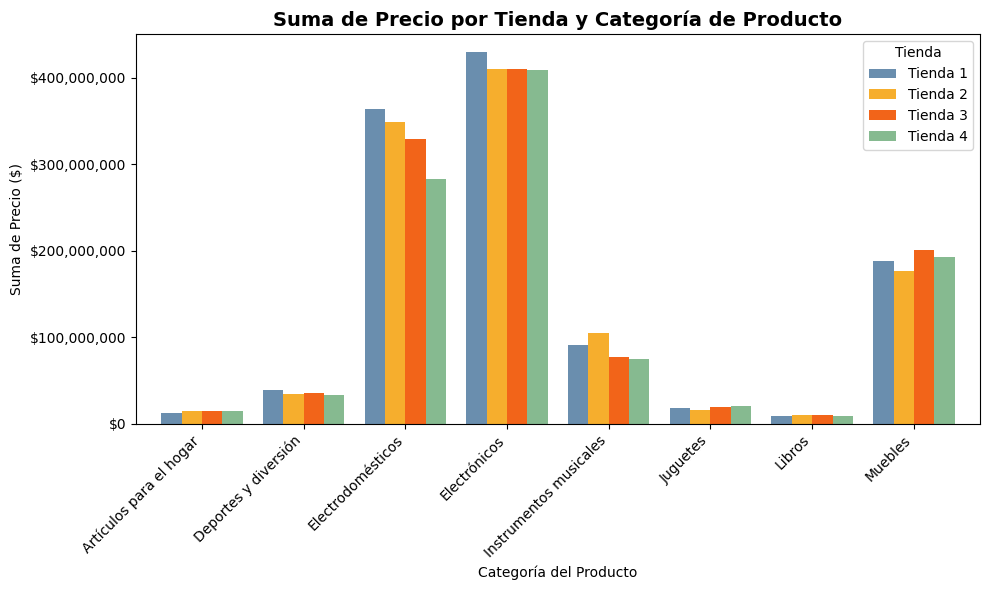

In [130]:
# Agrupar y preparar datos
tabla = tiendas.pivot_table(values='Precio', index='Categoría del Producto', columns='Tienda', aggfunc='sum')

# Crear gráfico
tabla.plot(
    kind='bar',
    figsize=(10,6),
    width=0.8,
    color = ["#6A8EAE", "#F6AE2D", "#F26419", "#86BA90"]
)

# Título y etiquetas
plt.title("Suma de Precio por Tienda y Categoría de Producto", fontsize=14, fontweight='bold')
plt.xlabel("Categoría del Producto")
plt.ylabel("Suma de Precio ($)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tienda")

# Mostrar valores en formato moneda
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${x:,.0f}")
)

plt.tight_layout()
plt.show()


##3. Reseña de los clientes

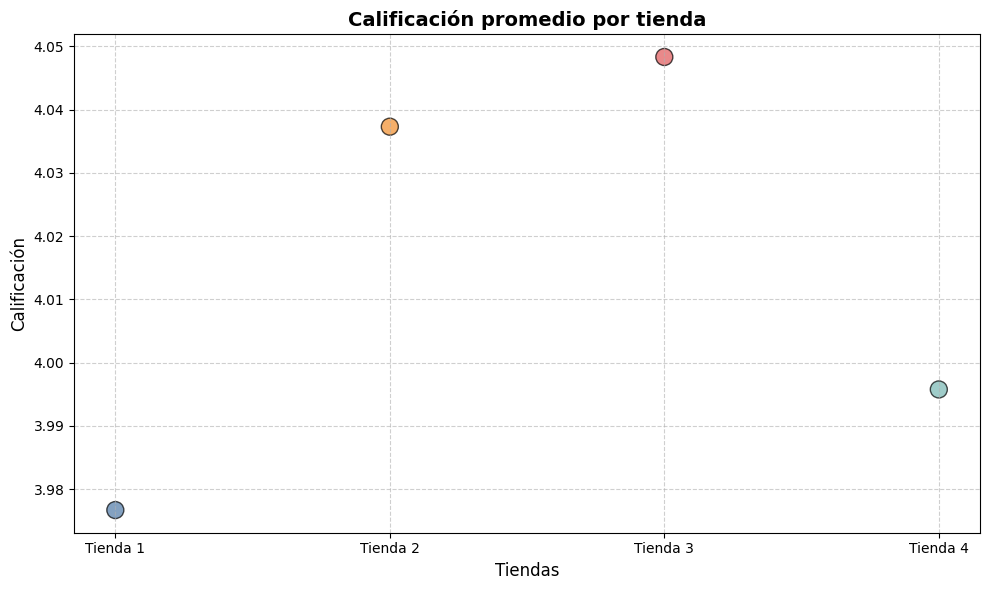

In [131]:
# Crear una Serie con nombres
calificaciones_tiendas = pd.Series(
    [calificacion_t1, calificacion_t2, calificacion_t3, calificacion_t4],
    index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)

# Crear el gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(
    range(len(calificaciones_tiendas)),
    calificaciones_tiendas.values,
    color=["#4E79A7", "#F28E2B", "#E15759", "#76B7B2"],
    s=150,
    alpha=0.7,
    edgecolors='k'
)

# Personalización
plt.title("Calificación promedio por tienda", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Calificación", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(len(calificaciones_tiendas)), calificaciones_tiendas.index)
plt.tight_layout()
plt.show()

##4. Productos más vendidos

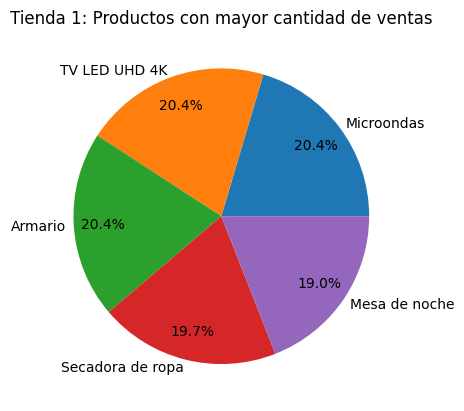

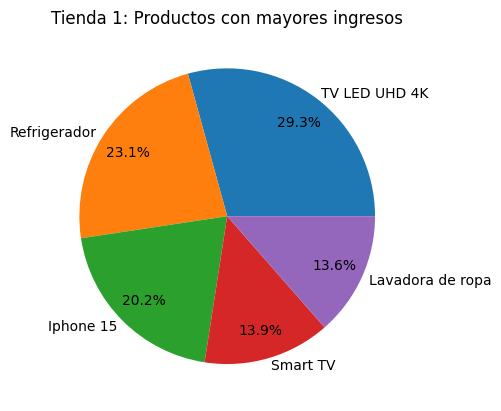

In [132]:
#Tienda 1: Productos con mayor cantidad de ventas

productos_t1=tienda1["Producto"].value_counts().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

productos_t1.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 1: Productos con mayor cantidad de ventas"
)
plt.ylabel("")
plt.show()

print("\n")

#Tienda 1: Mayores ingresos por producto

# Agrupar por producto y calcular el total de ingresos
ingresos_producto_t1 = tienda1.groupby("Producto")["Precio"].sum().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

ingresos_producto_t1.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 1: Productos con mayores ingresos"
)
plt.ylabel("")
plt.show()

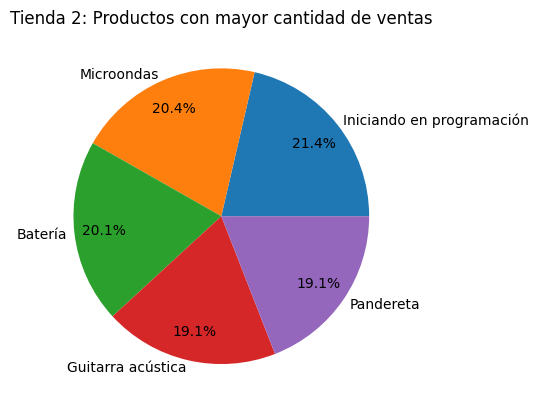

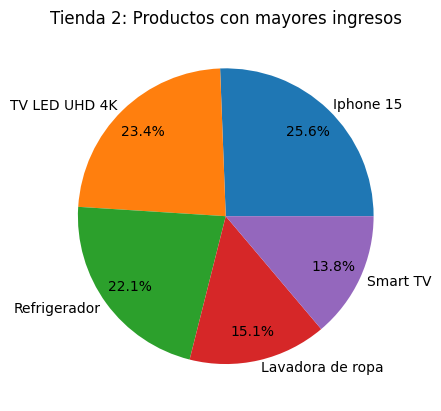

In [133]:
#Tienda 2: Productos con mayor cantidad de ventas

productos_t2=tienda2["Producto"].value_counts().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

productos_t2.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 2: Productos con mayor cantidad de ventas"
)
plt.ylabel("")
plt.show()

print("\n")

#Tienda 2: Mayores ingresos por producto

# Agrupar por producto y calcular el total de ingresos
ingresos_producto_t2 = tienda2.groupby("Producto")["Precio"].sum().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

ingresos_producto_t2.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 2: Productos con mayores ingresos"
)
plt.ylabel("")
plt.show()

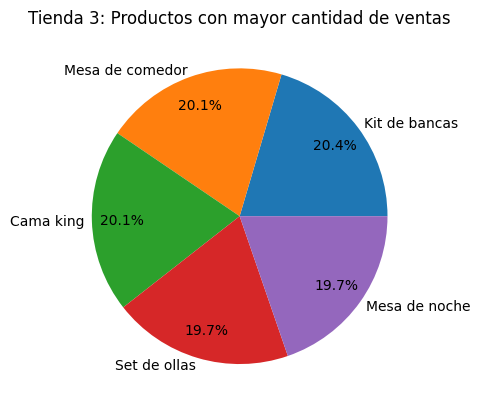

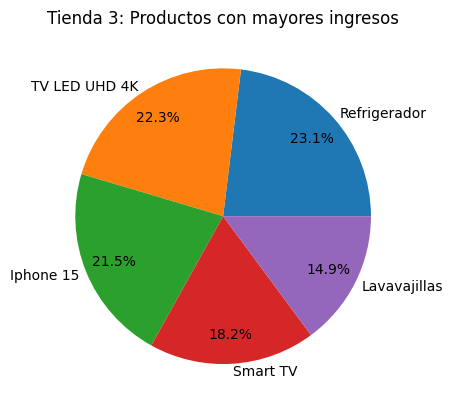

In [134]:
#Tienda 3: Productos con mayor cantidad de ventas

productos_t3=tienda3["Producto"].value_counts().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

productos_t3.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 3: Productos con mayor cantidad de ventas"
)
plt.ylabel("")
plt.show()

print("\n")

#Tienda 3: Mayores ingresos por producto

# Agrupar por producto y calcular el total de ingresos
ingresos_producto_t3 = tienda3.groupby("Producto")["Precio"].sum().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

ingresos_producto_t3.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 3: Productos con mayores ingresos"
)
plt.ylabel("")
plt.show()

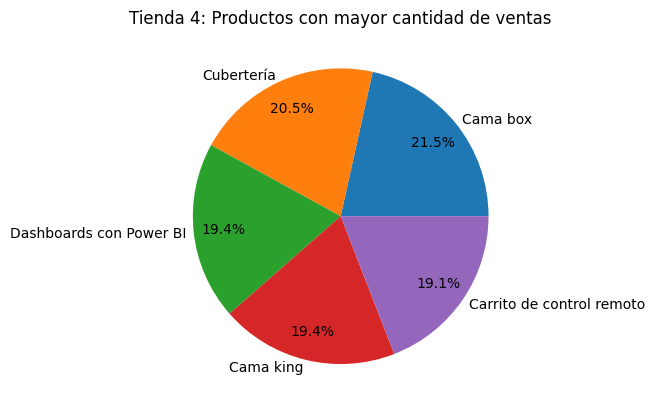

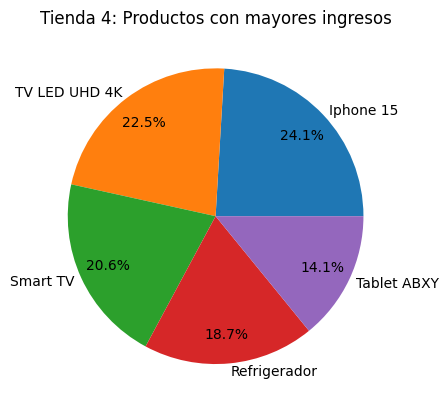

In [135]:
#Tienda 4: Productos con mayor cantidad de ventas

productos_t4=tienda4["Producto"].value_counts().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

productos_t4.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 4: Productos con mayor cantidad de ventas"
)
plt.ylabel("")
plt.show()

print("\n")

#Tienda 4: Mayores ingresos por producto

# Agrupar por producto y calcular el total de ingresos
ingresos_producto_t4 = tienda4.groupby("Producto")["Precio"].sum().sort_values(ascending=False).head()

# Visualización en gráfico de pastel

ingresos_producto_t4.plot.pie(
    autopct="%1.1f%%",          # ← Muestra el porcentaje con 1 decimal
    pctdistance=0.8,            # Ajusta qué tan cerca del borde va el porcentaje
    labeldistance=1.05,         # Ajusta distancia de etiquetas
    title="Tienda 4: Productos con mayores ingresos"
)
plt.ylabel("")
plt.show()

##5. Costos de envio

Tienda
Tienda 1   26,019
Tienda 2   25,216
Tienda 3   24,806
Tienda 4   23,459
Name: Costo de envío, dtype: float64


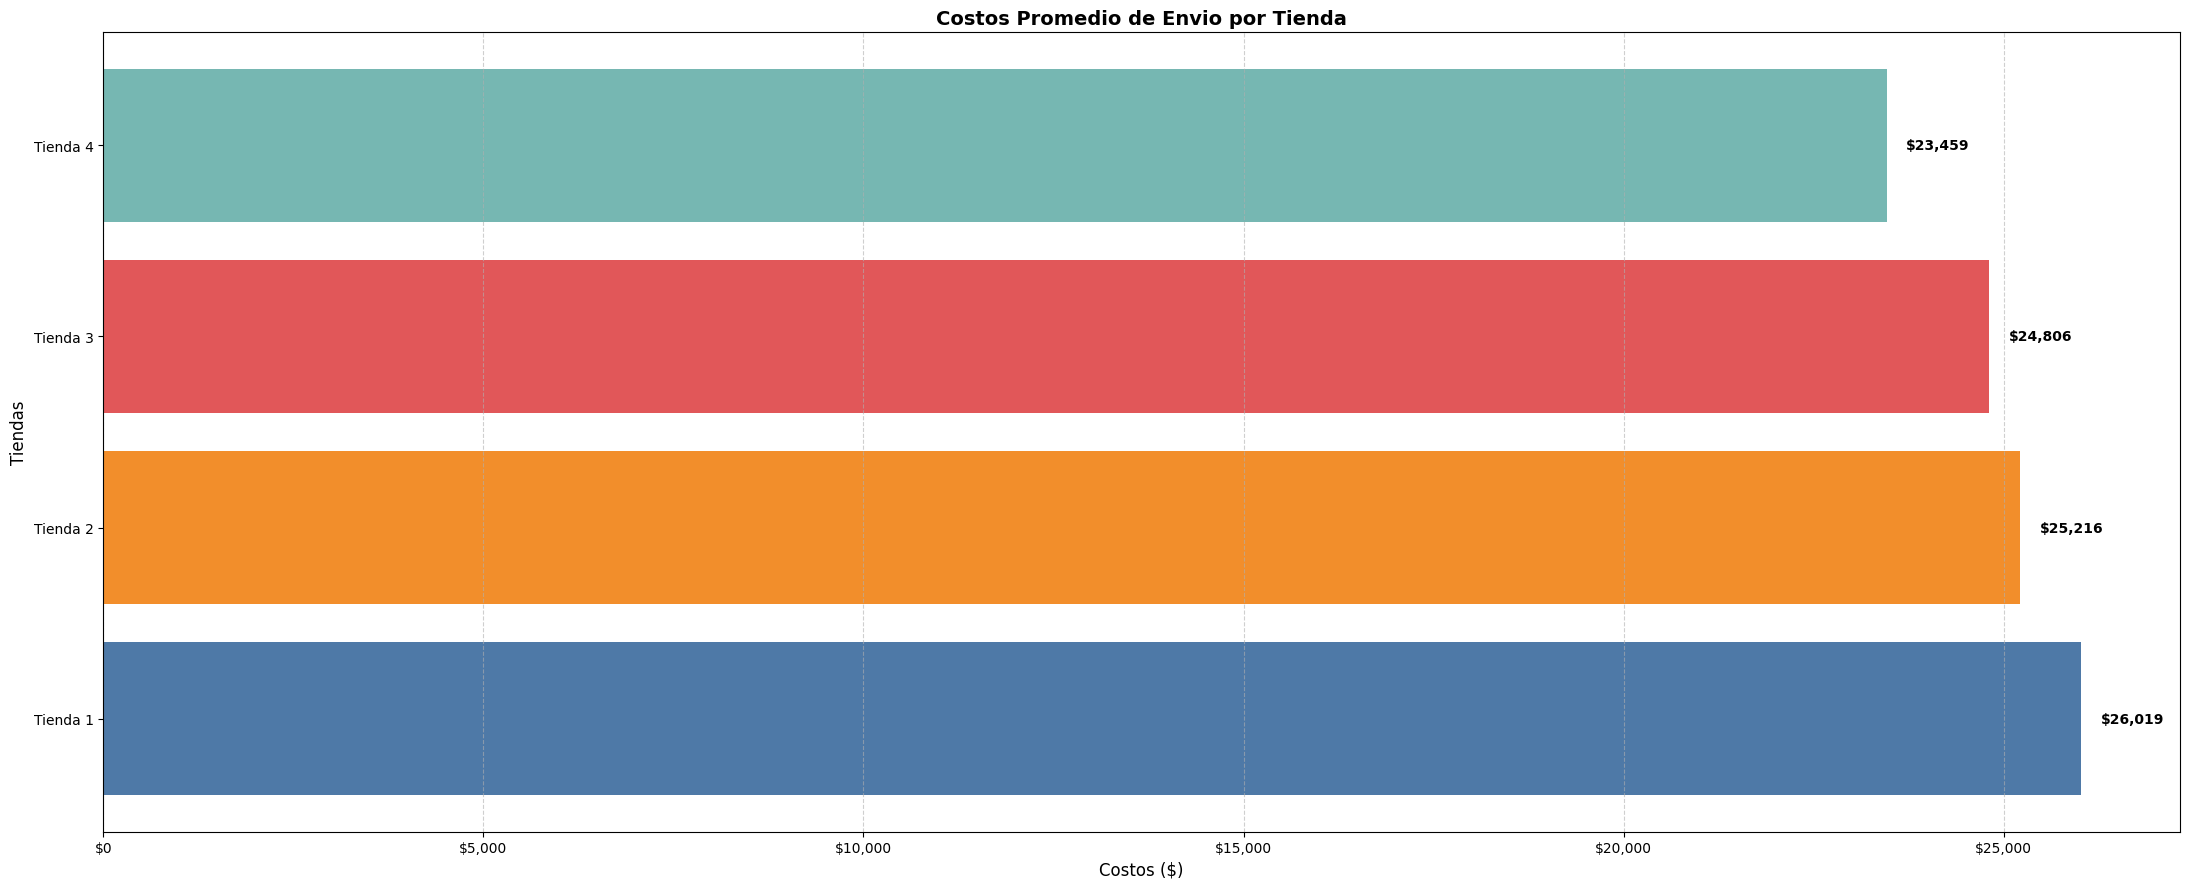

In [136]:
envios_promedio_tiendas = tiendas.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=False)
print(envios_promedio_tiendas)

plt.figure(figsize=(22,9))
barras = plt.barh(
    envios_promedio_tiendas.index,
    envios_promedio_tiendas.values,
    color=["#4E79A7", "#F28E2B", "#E15759", "#76B7B2"])

plt.title("Costos Promedio de Envio por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Costos ($)", fontsize=12)
plt.ylabel("Tiendas", fontsize=12)

# Formato del eje X con símbolo de pesos
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Mostrar los valores encima de cada barra
for barra in barras:
    plt.text(
        barra.get_width() + envios_promedio_tiendas.max() * 0.01,  # 1% del máximo
        barra.get_y() + barra.get_height()/2,
        f"${barra.get_width():,.0f}",
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()